In [7]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('../datasets/housing.csv', header=None, 
                 delimiter=r"\s+", names=column_names)

df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

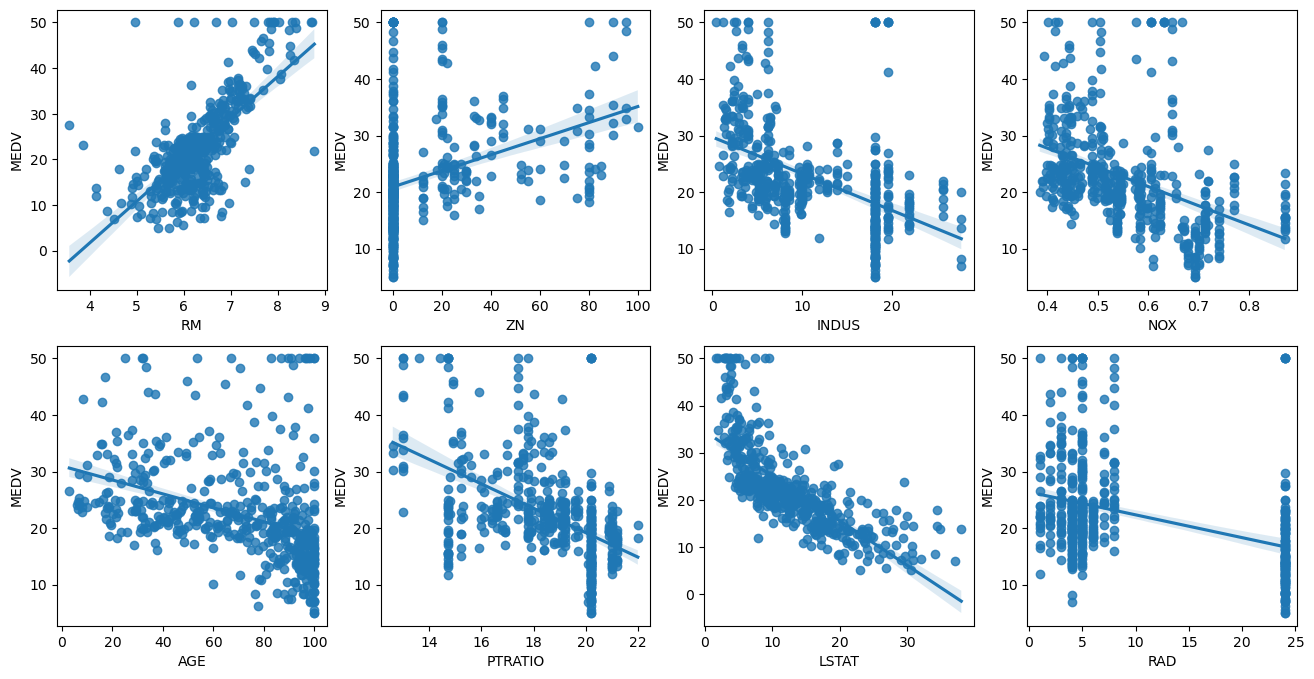

In [9]:
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4

    sns.regplot(x=feature, y='MEDV', data=df, ax=axs[row][col])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [12]:
y_target = df['MEDV']
X_data = df.drop(['MEDV'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0: .3f}, RMSE : {1: .3F}'.format(mse, rmse))
print('Variance socre : {0: .3f}'.format(r2_score(y_test, y_preds)))

MSE :  17.297, RMSE :  4.159
Variance socre :  0.757


In [13]:
lr.coef_

array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
       -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
        3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
       -5.66182106e-01])